# Exercise 4 : Linear Regression

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---

## Setup : Import the Dataset

Dataset from Kaggle : The **"House Prices"** competition     
Source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

The dataset is `train.csv`; hence we use the `read_csv` function from Pandas.  
Immediately after importing, take a quick look at the data using the `head` function.

In [2]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


---

## Problem 1 : Predicting SalePrice using GrLivArea

Plot `SalePrice` against `GrLivArea` using standard ScatterPlot/JointPlot.

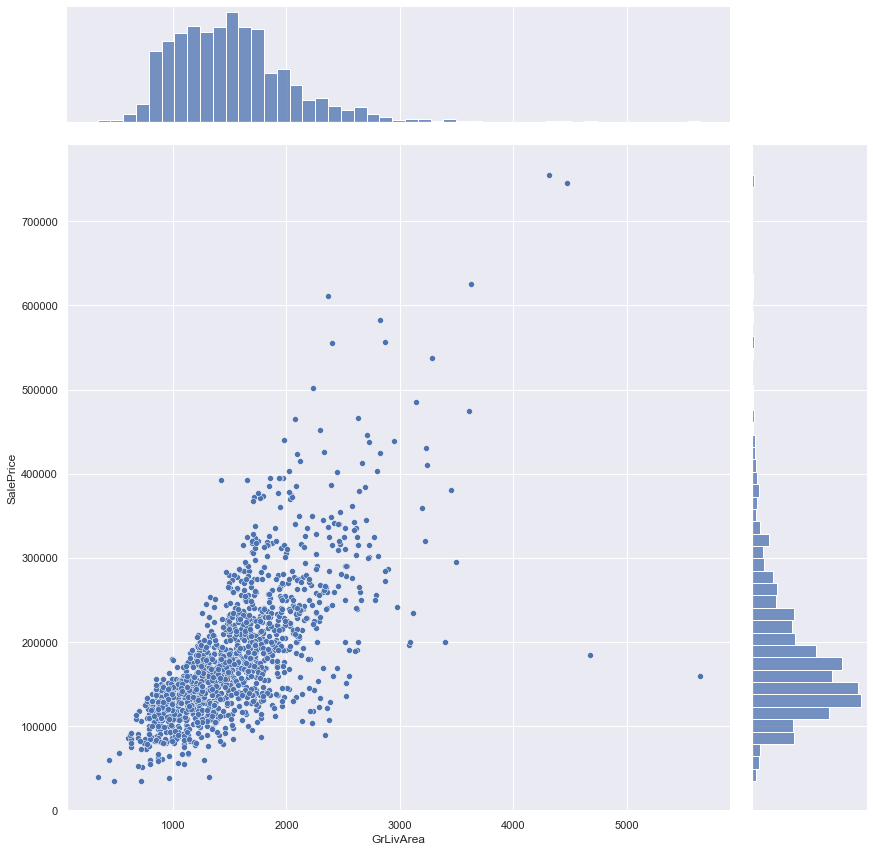

In [3]:
sb.jointplot(data = houseData, x = "GrLivArea", y = "SalePrice", height = 12)

Check the Correlation Coefficient to get a confirmation on the strong linear relationship you observe.

In [4]:
houseData.SalePrice.corr(houseData.GrLivArea)

0.7086244776126522

Import the `LinearRegression` model from `sklearn.linear_model`.

In [5]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

Split the dataset in Train and Test sets, uniformly at random.   
Train Set with 1100 samples and Test Set with 360 samples.     

In [6]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(houseData['SalePrice'])
X = pd.DataFrame(houseData['GrLivArea'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 360)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


Fit Linear Regression model on the Training Dataset.

In [7]:
linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

Check the coefficients of the Linear Regression model you just fit.

In [8]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [9401.77127314]
Coefficients 	: a =  [[113.87640155]]


Plot the regression line based on the coefficients-intercept form.

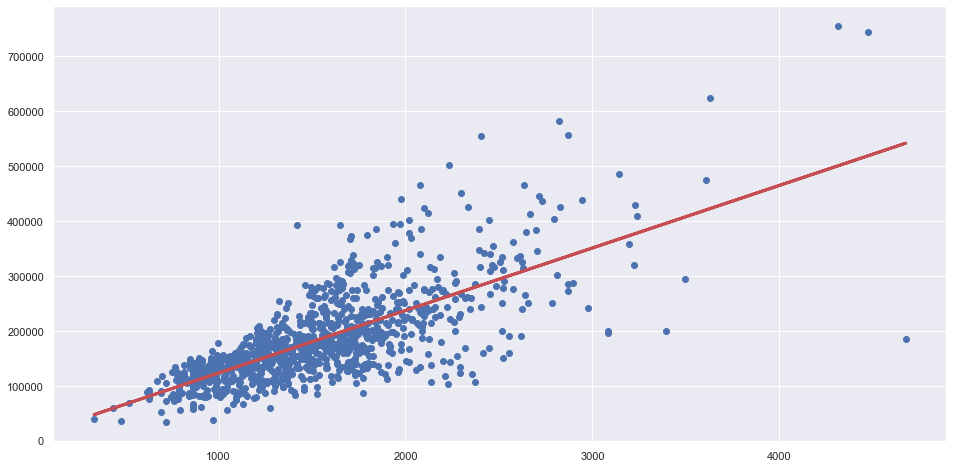

In [9]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

Check how good the predictions are on the Train Set.    
Metric : Explained Variance or R^2 on the Train Set.

In [10]:
# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))

Explained Variance (R^2) 	: 0.5340296119421228


Metric : Mean Squared Error (MSE) on the Train Set.

In [11]:
# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

Mean Squared Error (MSE) 	: 3059483255.3265624


#### Prediction of Response based on the Predictor

Predict `SalePrice` given `GrLivArea` in the Test dataset.

In [12]:
# Predict SalePrice values corresponding to GrLivArea
y_test_pred = linreg.predict(X_test)

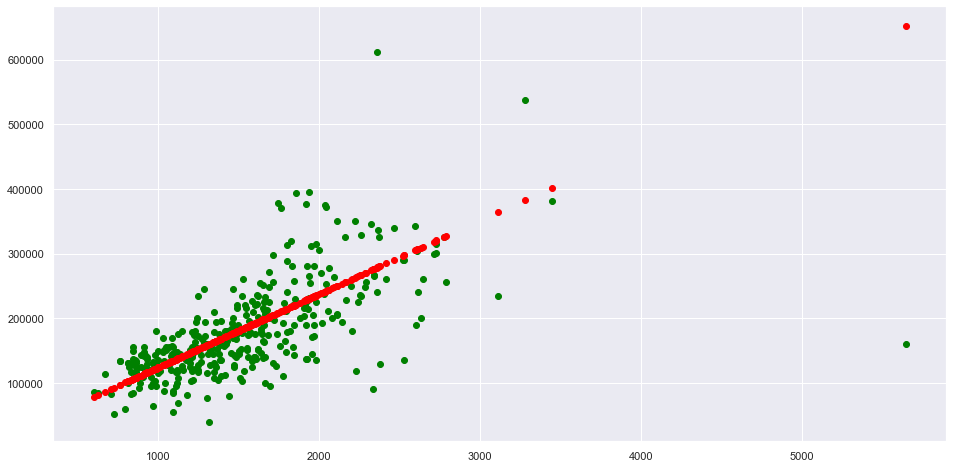

In [13]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

Check how good the predictions are on the Test Set.    
Metric : Mean Squared Error (MSE) on the Train Set.

In [14]:
# Compute MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

Mean Squared Error (MSE) 	: 3440839968.4847474


---

## Problem 2 : Predicting SalePrice using LotArea

Check the relationship between the two variables : `SalePrice` and the Predictor.     

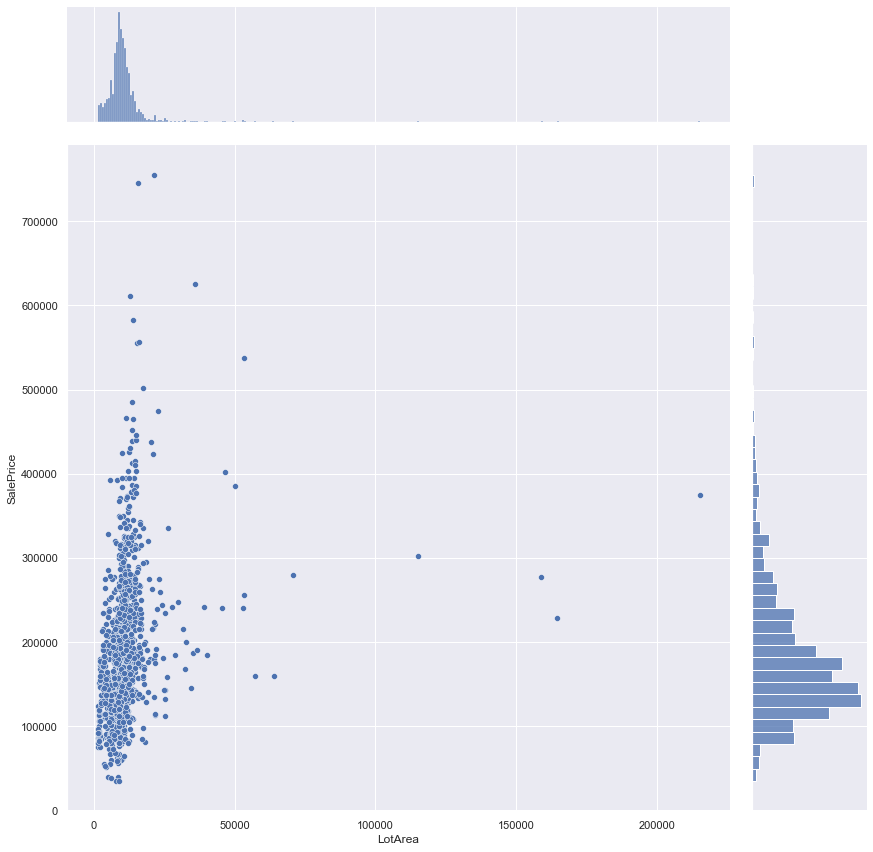

In [15]:
sb.jointplot(data = houseData, x = "LotArea", y = "SalePrice", height = 12)

In [16]:
houseData.SalePrice.corr(houseData.LotArea)

0.26384335387140573

#### Linear Regression on SalePrice vs Predictor   

In [17]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(houseData['SalePrice'])
X = pd.DataFrame(houseData['LotArea'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 360)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


In [18]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

Intercept 	: b =  [161460.09547474]
Coefficients 	: a =  [[1.70291993]]


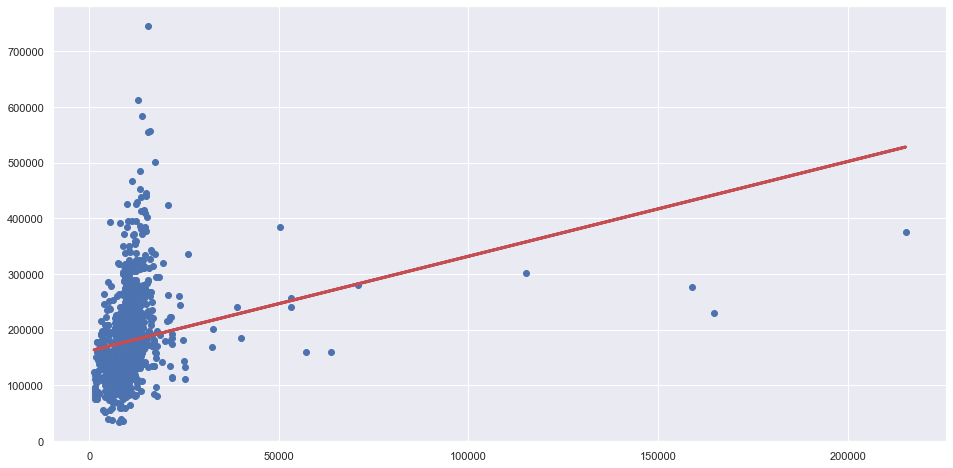

In [19]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

Check how good the predictions are on the Train Set.    
Metric : Explained Variance or R^2 on the Train Set.   
Metric : Mean Squared Error (MSE) on the Train Set.   

In [20]:
# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

Explained Variance (R^2) 	: 0.05694364321108347
Mean Squared Error (MSE) 	: 5746184372.767614


#### Prediction of Response based on the Predictor

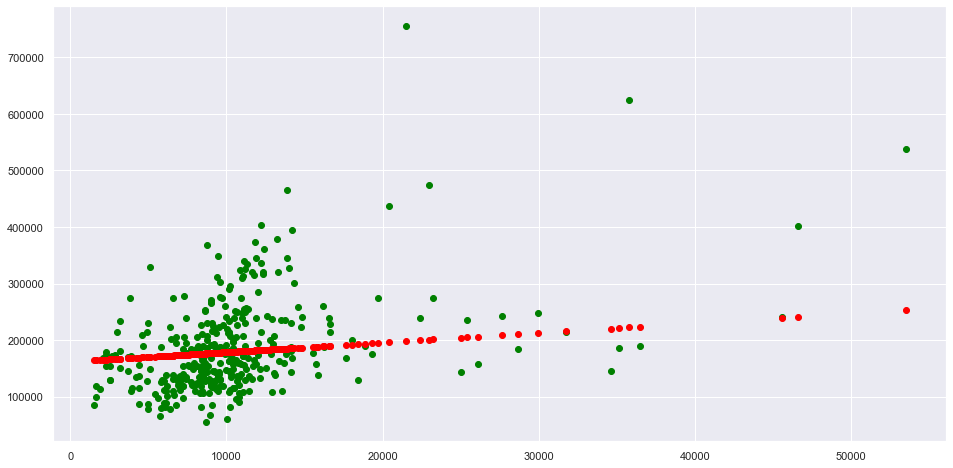

In [21]:
# Predict SalePrice values corresponding to Predictor
y_test_pred = linreg.predict(X_test)

# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

Check how good the predictions are on the Test Set.    
Metric : Mean Squared Error (MSE) on the Train Set.

In [22]:
# Compute MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

Mean Squared Error (MSE) 	: 6312628036.934192


---

## Problem 2 : Predicting SalePrice using TotalBsmtSF

Check the relationship between the two variables : `SalePrice` and the Predictor.     

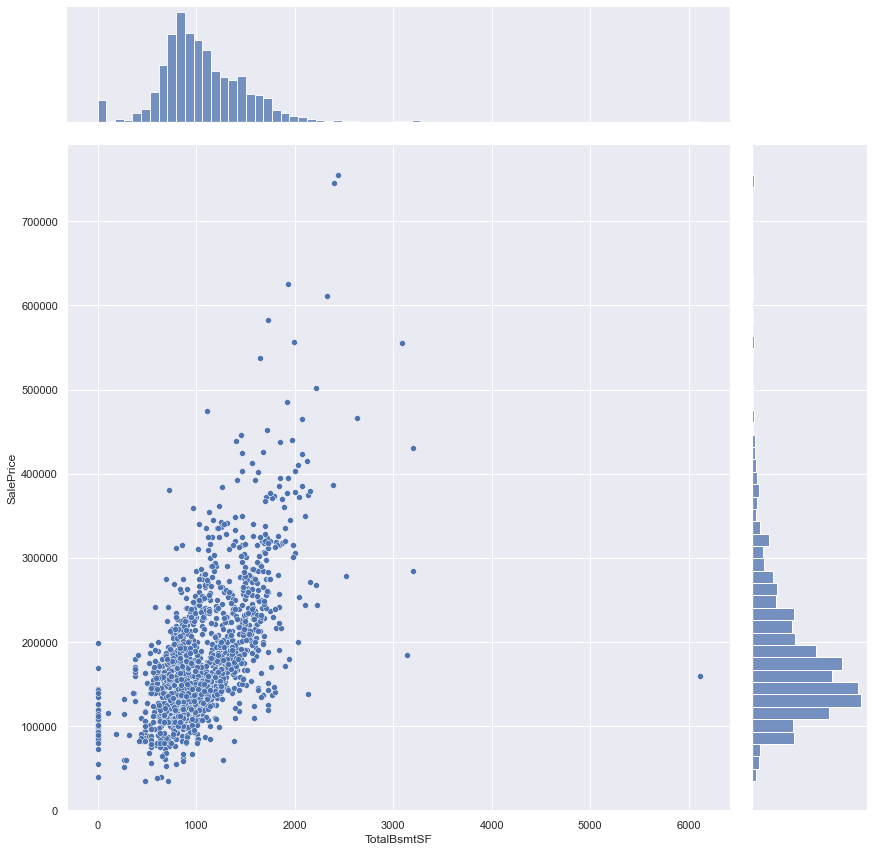

In [23]:
sb.jointplot(data = houseData, x = "TotalBsmtSF", y = "SalePrice", height = 12)

In [24]:
houseData.SalePrice.corr(houseData.TotalBsmtSF)

0.6135805515591956

#### Linear Regression on SalePrice vs Predictor   

In [25]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(houseData['SalePrice'])
X = pd.DataFrame(houseData['TotalBsmtSF'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 360)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


In [26]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

Intercept 	: b =  [67116.87650897]
Coefficients 	: a =  [[107.54551488]]


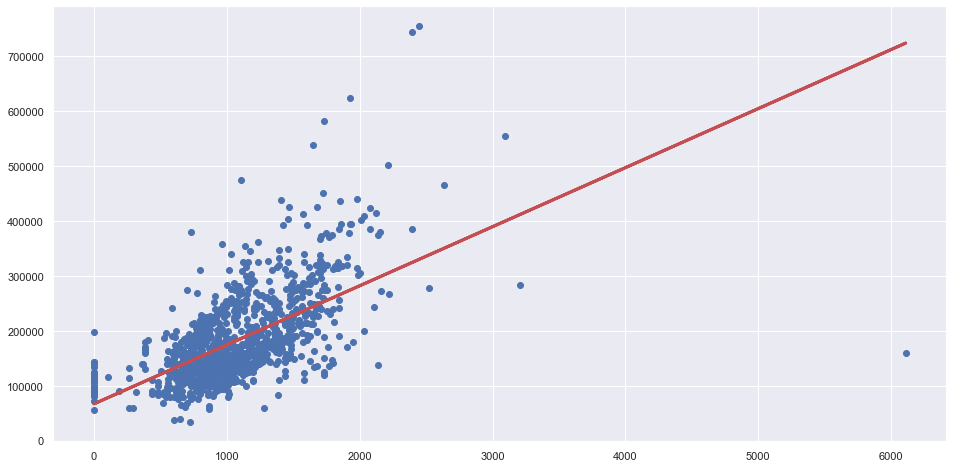

In [27]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

Check how good the predictions are on the Train Set.    
Metric : Explained Variance or R^2 on the Train Set.   
Metric : Mean Squared Error (MSE) on the Train Set.   

In [28]:
# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

Explained Variance (R^2) 	: 0.35978297283766747
Mean Squared Error (MSE) 	: 4036132693.2178817


#### Prediction of Response based on the Predictor

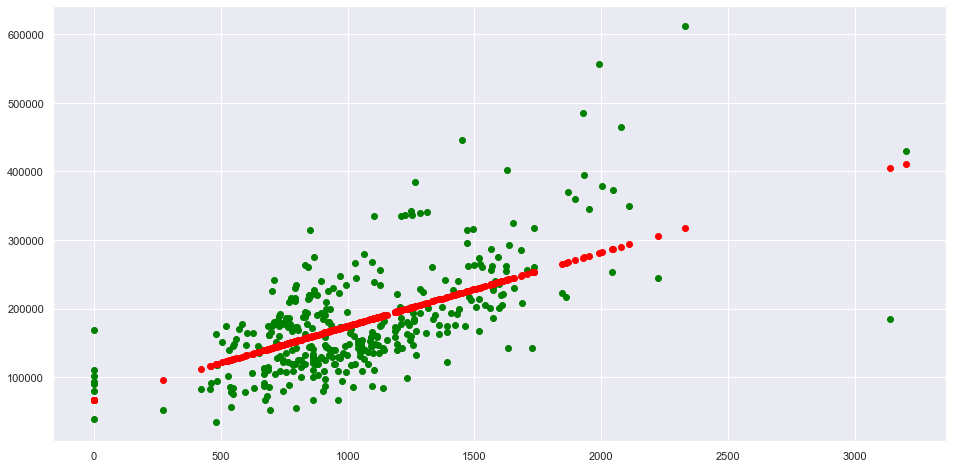

In [29]:
# Predict SalePrice values corresponding to Predictor
y_test_pred = linreg.predict(X_test)

# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

Check how good the predictions are on the Test Set.    
Metric : Mean Squared Error (MSE) on the Train Set.

In [30]:
# Compute MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

Mean Squared Error (MSE) 	: 3625382634.5271297


---

## Problem 2 : Predicting SalePrice using GarageArea

Check the relationship between the two variables : `SalePrice` and the Predictor.     

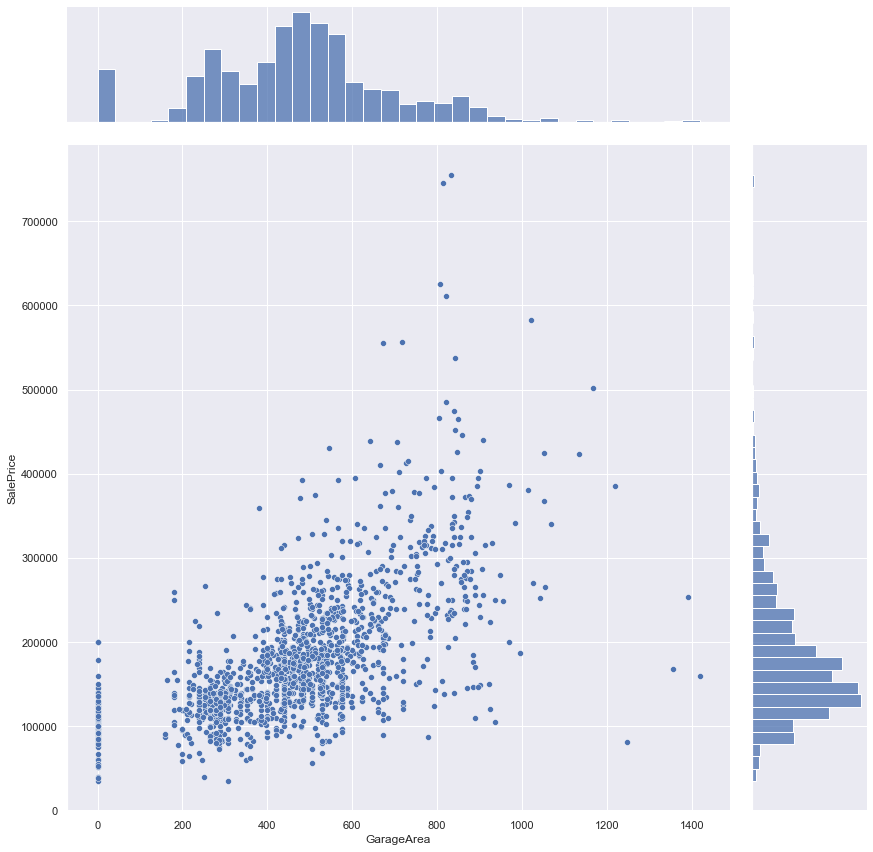

In [31]:
sb.jointplot(data = houseData, x = "GarageArea", y = "SalePrice", height = 12)

In [32]:
houseData.SalePrice.corr(houseData.GarageArea)

0.6234314389183617

#### Linear Regression on SalePrice vs Predictor   

In [33]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(houseData['SalePrice'])
X = pd.DataFrame(houseData['GarageArea'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 360)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


In [34]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

Intercept 	: b =  [73893.0880396]
Coefficients 	: a =  [[223.15769253]]


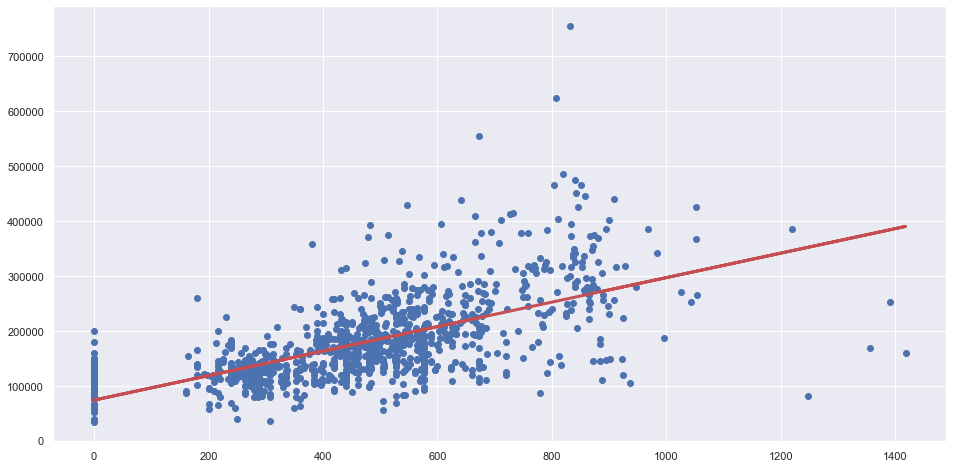

In [35]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

Check how good the predictions are on the Train Set.    
Metric : Explained Variance or R^2 on the Train Set.   
Metric : Mean Squared Error (MSE) on the Train Set.   

In [36]:
# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

Explained Variance (R^2) 	: 0.3856595104936924
Mean Squared Error (MSE) 	: 3682132085.6294003


#### Prediction of Response based on the Predictor

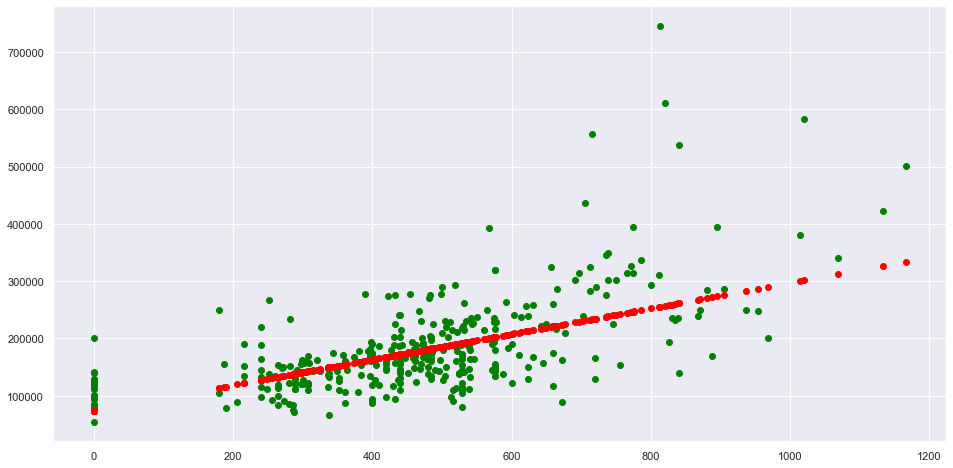

In [37]:
# Predict SalePrice values corresponding to Predictor
y_test_pred = linreg.predict(X_test)

# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

Check how good the predictions are on the Test Set.    
Metric : Mean Squared Error (MSE) on the Train Set.

In [38]:
# Compute MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

Mean Squared Error (MSE) 	: 4407653993.125402


---

## Problem 3 : Comparing the Uni-Variate Linear Models

Compare and contrast the four models in terms of `R^2` and `MSE` on Train Data, as well as `MSE` on Test Data.    

* `SalePrice` vs `GrLivArea` has the best Explained Variance (R^2) out of the four models.   
* `SalePrice` vs `LotArea` has the worst Explained Variance (R^2) out of the four models.   
* Naturally, the model with `GrLivArea` is the best one in terms of just the Training accuracy.    


* We also find `SalePrice` vs `GrLivArea` has the minimum MSE on both the Train and Test Sets compared to other models.   
* We also find `SalePrice` vs `LotArea` has the maximum MSE on both the Train and Test Sets compared to other models.   
* Naturally, the model with `GrLivArea` is the best one in terms of Test accuracy as evident from MSE (error) on the Test Set.    

So, overall, the predictor `GrLivArea` is the best amongst the four in predicting `SalePrice`.      

**Did you notice?** : Go back and check again the R^2 and MSE values for the four models. I am pretty sure you did not get the exact same values as I did. This is due to the random selection of Train-Test sets. In fact, if you run the above cells again, you will get a different set of R^2 and MSE values. If that is so, can we *really* be confident that `GrLivArea` will always be the best variable to predict `SalePrice`? Think about it. ;-)

---

## Extra : Predicting SalePrice using Multiple Variables

Extract the required variables from the dataset, and then perform Multi-Variate Regression.     

In [39]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(houseData['SalePrice'])
X = pd.DataFrame(houseData[['GrLivArea','LotArea','TotalBsmtSF','GarageArea']])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 360)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(X_train, y_train)

Train Set : (1100, 4) (1100, 1)
Test Set  : (360, 4) (360, 1)


LinearRegression()

#### Coefficients of the Linear Regression Model

Note that you CANNOT visualize the model as a line on a 2D plot, as it is a multi-dimensional surface.

In [40]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [-14211.32889778]
Coefficients 	: a =  [[ 58.75247399   0.19845451  48.29950286 109.17290569]]


#### Prediction of Response based on the Predictor

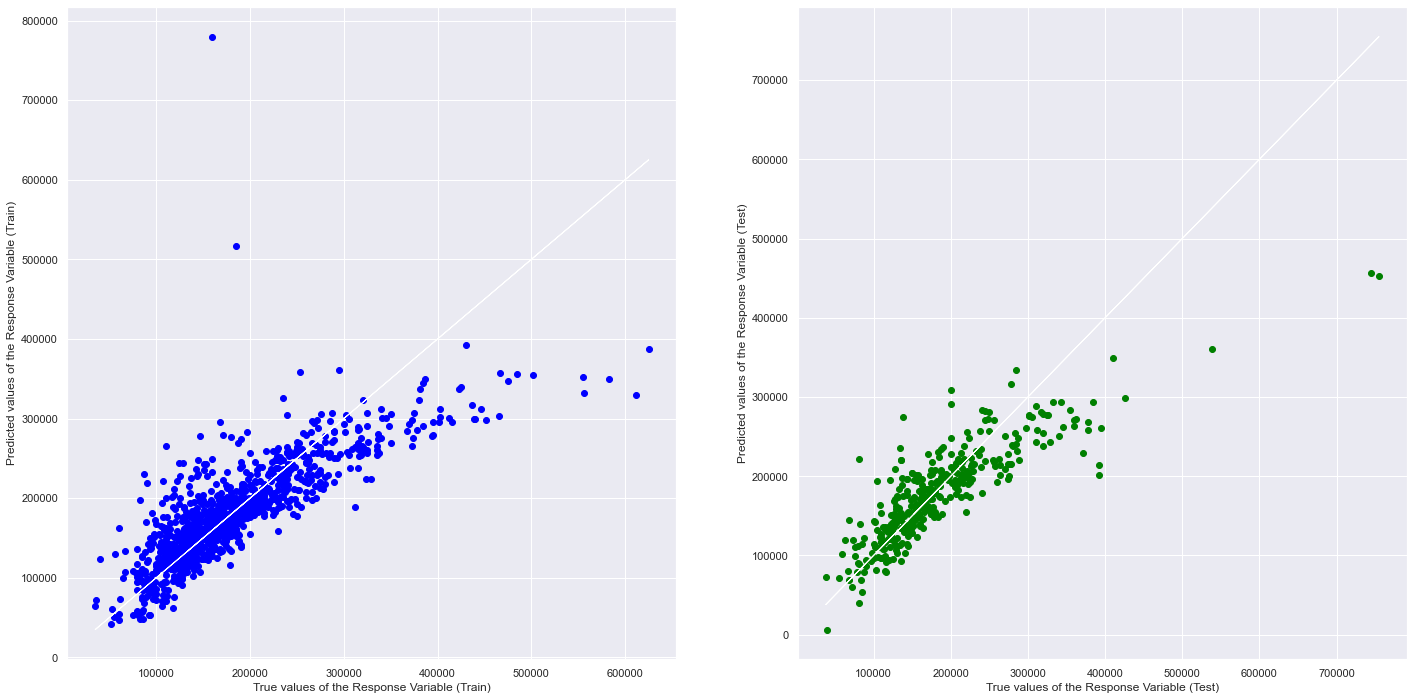

In [41]:
# Predict SalePrice values corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [42]:
print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

Explained Variance (R^2) on Train Set 	: 0.6427413469442668
Mean Squared Error (MSE) on Train Set 	: 2124417098.3879576
Mean Squared Error (MSE) on Test Set 	: 2222572939.110506


**Observation** : The model with `SalePrice` against all the four variables `GrLivArea`, `LotArea`, `TotalBsmtSF`, `GarageArea` is definitely better!